## 1. Business Problem & Objective


### 
Customer churn directly impacts revenue and long-term growth. The objective of this project is to:

-Identify key churn drivers

-Analyze tenure vs churn behavior

-Segment high-risk customers

-Provide actionable retention strategies

-(Optional) Build a predictive churn model for proactive intervention

This project simulates a real-world analytics case where insights are expected to drive business decisions, not just visuals.

## 2. Dataset Description


###
Dataset: IBM Telco Customer Churn (Kaggle)

Key Tables: Single customer-level table (~7,000 rows)

Important Columns:

-tenure

-MonthlyCharges

-TotalCharges

-Contract

-PaymentMethod

-InternetService

-Churn

## 3.1 Data Preprocessing & Cleaning 

In [2]:
import pandas as pd
import numpy as np

# Load data
df_xlsx = pd.read_excel('D:\Datasets\IBM Telco for Churn Analysis\Telco_customer_churn.xlsx')

In [3]:
# Converting excel data into CSV
df_xlsx.to_csv(r'D:\Datasets\IBM Telco for Churn Analysis\Telco_customer_churn.csv',index=False)
df = pd.read_csv(r'D:\Datasets\IBM Telco for Churn Analysis\Telco_customer_churn.csv')
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
# Standardize column names 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

In [5]:
# Convert TotalCharges to numeric
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
df['total_charges']


0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: total_charges, Length: 7043, dtype: float64

In [6]:
df['total_charges'].isna().sum()

np.int64(11)

In [7]:
# Handle missing values
df['total_charges'].fillna(df['total_charges'].median(), inplace=True)
df['total_charges']

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: total_charges, Length: 7043, dtype: float64

## 3.2 Feature Engineering

In [11]:
# Encode churn (label encoding)
df['churn_flag'] = df['churn_label'].map({'Yes': 1, 'No': 0})
df['churn_flag'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: churn_flag, dtype: int64

In [16]:
# Tenure segmentation
#df['tenure_months'].head(10)
tenure_bins = [0, 6, 12, 24, 60, np.inf]
tenure_labels = ['0-6', '6-12', '12-24', '24-60', '60+']
df['tenure_group'] = pd.cut(df['tenure_months'], bins=tenure_bins, labels=tenure_labels)
df['tenure_group'].head(10)

0      0-6
1      0-6
2     6-12
3    24-60
4    24-60
5     6-12
6      0-6
7      0-6
8    24-60
9      0-6
Name: tenure_group, dtype: category
Categories (5, object): ['0-6' < '6-12' < '12-24' < '24-60' < '60+']

In [18]:
# Monthly charge bands
charge_bins = [0, 35, 70, 100, np.inf]
charge_labels = ['Low', 'Medium', 'High', 'Very High']
df['charge_band'] = pd.cut(df['monthly_charges'], bins=charge_bins, labels=charge_labels)
df['charge_band'].head(12)

0        Medium
1          High
2          High
3     Very High
4     Very High
5        Medium
6        Medium
7           Low
8          High
9           Low
10       Medium
11       Medium
Name: charge_band, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

<Axes: xlabel='charge_band', ylabel='churn_flag'>

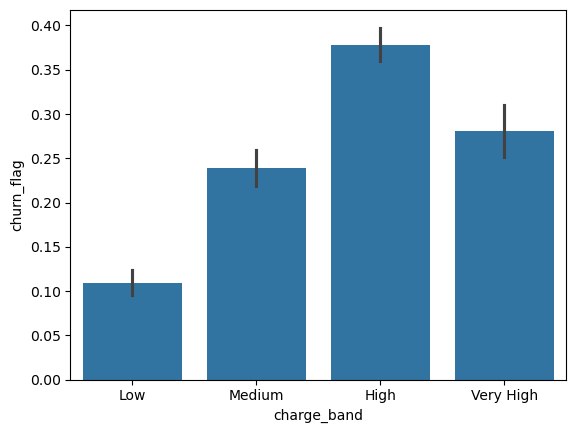

In [20]:
import seaborn as sns
sns.barplot(x='charge_band', y='churn_flag', data=df)

#Typical insight:
#Low charges → low churn
#Very high charges → high churn


## 4. Churn Overview & KPIs

In [23]:
#churn tenure overview
churn_rate = df['churn_flag'].mean() * 100

avg_tenure_churned = df[df['churn_flag']==1]['tenure_months'].mean()
avg_tenure_retained = df[df['churn_flag']==0]['tenure_months'].mean()


summary = pd.DataFrame({
'Metric': ['Churn Rate %', 'Avg Tenure (Churned)', 'Avg Tenure (Retained)'],
'Value': [churn_rate, avg_tenure_churned, avg_tenure_retained]
})
summary

,Metric,Value
0,Churn Rate %,26.536987
1,Avg Tenure (Churned),17.979133
2,Avg Tenure (Retained),37.569965


#### 4.1 Churn Distribution (Count & Percentage)

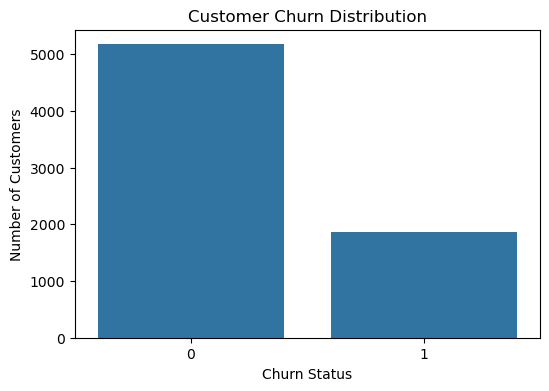

In [27]:
#Business Insight: Provides a quick sense of churn magnitude and scale.
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='churn_flag')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()


#### 4.2 Churn Rate KPI (Bar Chart)

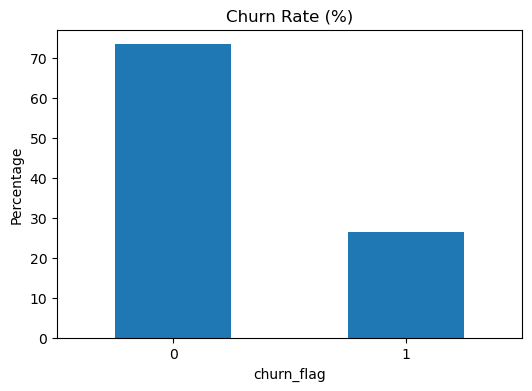

In [28]:
#Insight: Roughly one-fourth of the customer base is churning, indicating a serious retention issue.
churn_kpi = df['churn_flag'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
churn_kpi.plot(kind='bar')
plt.title('Churn Rate (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

#### 4.3 Average Monthly Charges by Churn

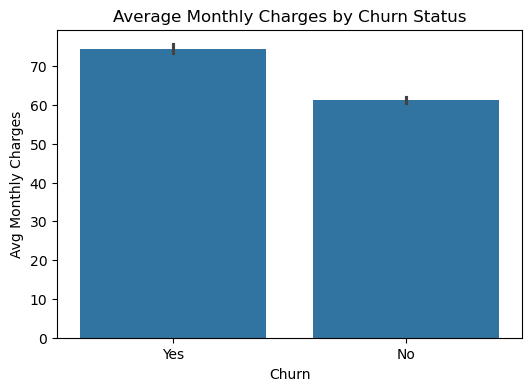

In [31]:
#Insight: Churned customers tend to have higher monthly charges, suggesting pricing sensitivity.
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='churn_label', y='monthly_charges', estimator='mean')
plt.title('Average Monthly Charges by Churn Status')
plt.ylabel('Avg Monthly Charges')
plt.xlabel('Churn')
plt.show()

#### 4.4 Average Tenure by Churn

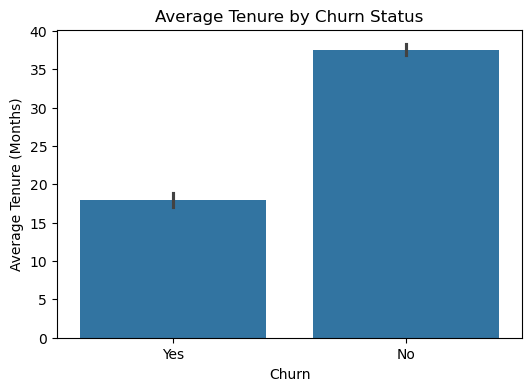

In [32]:
#Insight: Retained customers stay significantly longer, confirming early-life churn risk.
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='churn_label', y='tenure_months', estimator='mean')
plt.title('Average Tenure by Churn Status')
plt.ylabel('Average Tenure (Months)')
plt.xlabel('Churn')
plt.show()

#### 4.5 KPI summary table (later used in Power BI dashboard)

In [33]:
kpi_table = df.groupby('churn_flag').agg({
'tenure_months': 'mean',
'monthly_charges': 'mean',
'customerid': 'count'
}).rename(columns={'customerid': 'Customer Count'})

kpi_table

,tenure_months,monthly_charges,Customer Count
churn_flag,,,
0,37.569965,61.265124,5174
1,17.979133,74.441332,1869


#### 4.6 Churn Rate by Contract Type

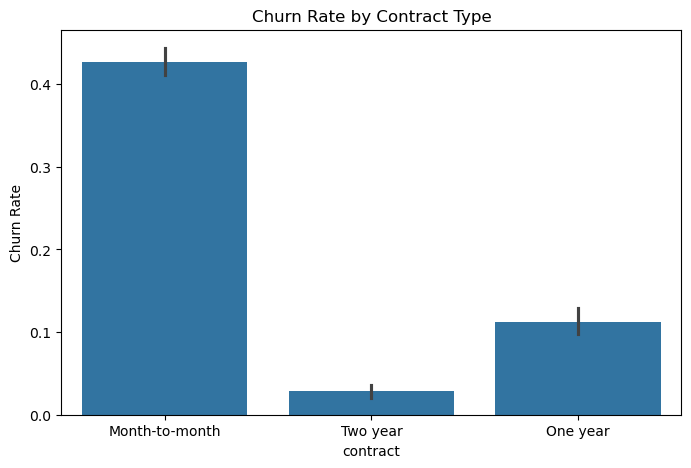

In [37]:
#Month-to-month contracts exhibit highest churn
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='contract', y='churn_flag')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

#### 4.7 Churn Rate by Payment Method

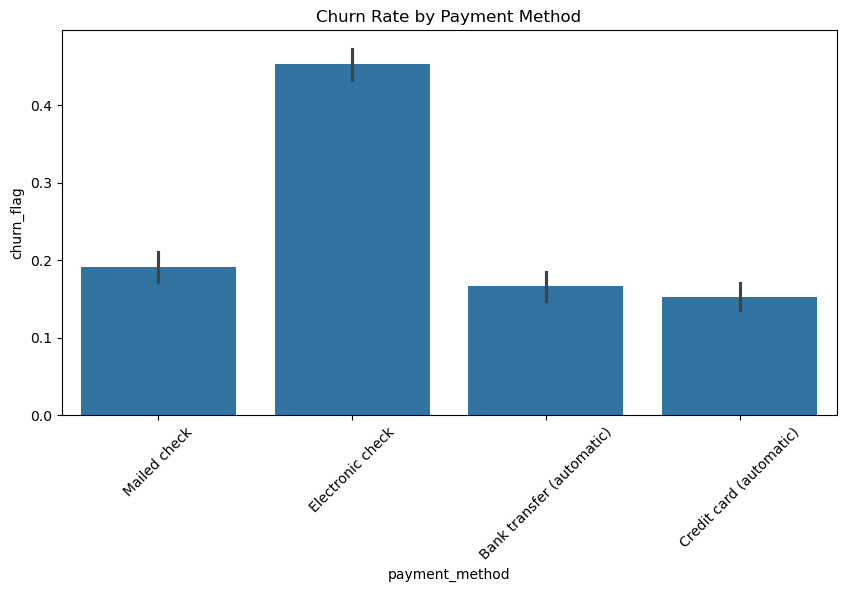

In [36]:
#Electronic check users are disproportionately at risk
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='payment_method', y='churn_flag')
plt.xticks(rotation=45)
plt.title('Churn Rate by Payment Method')
plt.show()

#### 4.8 Churn rate by Internet Service Type

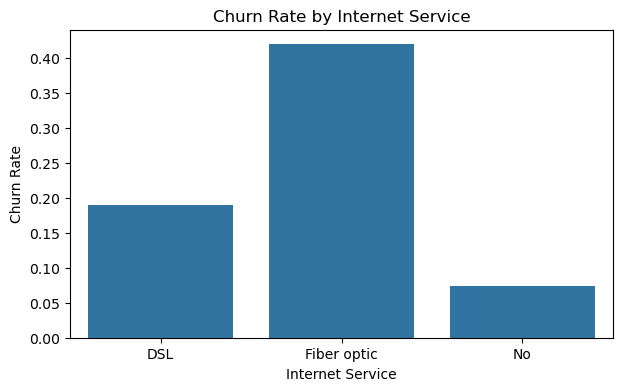

In [38]:
#Fiber optic users churn more despite premium pricing
internet_churn = df.groupby('internet_service')['churn_flag'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=internet_churn, x='internet_service', y='churn_flag')
plt.title('Churn Rate by Internet Service')
plt.ylabel('Churn Rate')
plt.xlabel('Internet Service')
plt.show()

### 5.Tenure vs Churn Analysis

#### 5.1 Churn rate by Tenure Group

C:\Users\risha\AppData\Local\Temp\ipykernel_2348\823067583.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('tenure_group')['churn_flag'].mean().reset_index()


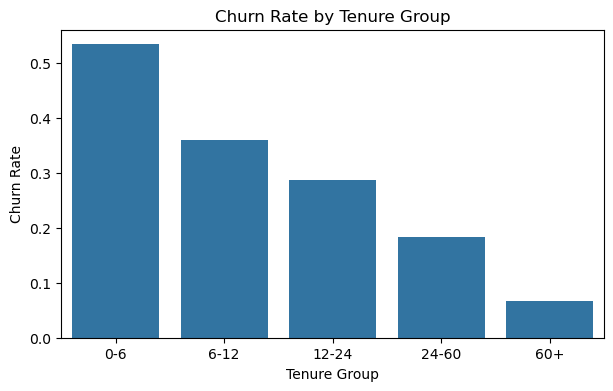

In [41]:
# Insight: Highest churn occurs within first 6 months
tenure_churn = df.groupby('tenure_group')['churn_flag'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=tenure_churn, x='tenure_group', y='churn_flag')
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Group')
plt.show()

#### 5.2 Continuous Tenure Trend

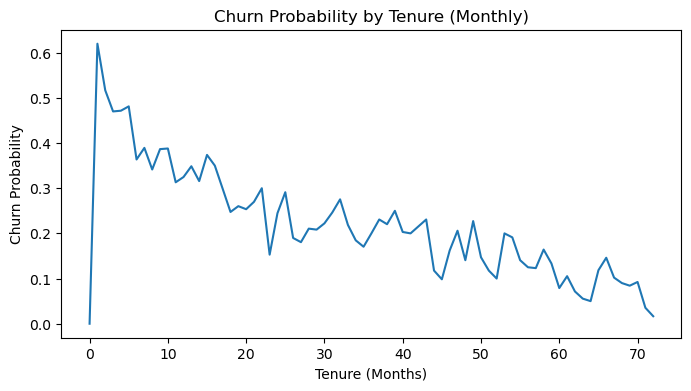

In [43]:
#Insight: Early customer life-cycle is the most fragile.
tenure_line = df.groupby('tenure_months')['churn_flag'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=tenure_line, x='tenure_months', y='churn_flag')
plt.title('Churn Probability by Tenure (Monthly)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Probability')
plt.show()

#### 5.3 Tenure Distribution by Churn Status

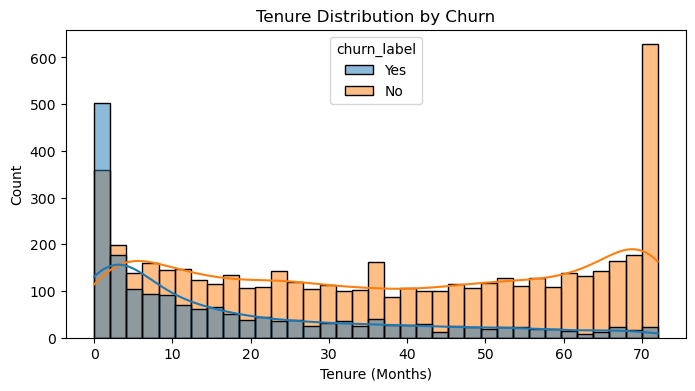

In [50]:
#Insight : Churned customers are concentrated at low tenure (0-12)
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='tenure_months', hue='churn_label', bins=35, kde=True)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.show()

## 6. Customer Risk Segmentation

In [51]:
segment = df.groupby(['tenure_group', 'charge_band'])['churn_flag'].mean().reset_index()
pivot = segment.pivot(index='tenure_group', columns='charge_band', values='churn_flag')
pivot



C:\Users\risha\AppData\Local\Temp\ipykernel_2348\4294928735.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment = df.groupby(['tenure_group', 'charge_band'])['churn_flag'].mean().reset_index()


charge_band,Low,Medium,High,Very High
tenure_group,,,,
0-6,0.288330,0.532909,0.721707,0.782609
6-12,0.131313,0.204082,0.586572,0.750000
12-24,0.055351,0.221818,0.440476,0.568966
24-60,0.038603,0.099115,0.258439,0.333333
60+,0.003584,0.023256,0.059305,0.136792


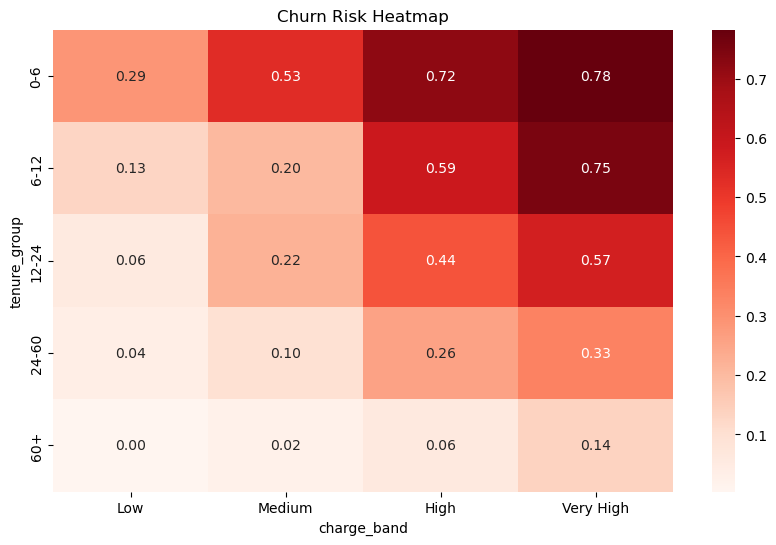

In [52]:
#insight : High-risk group: Low-tenure + High monthly charge
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='Reds')
plt.title('Churn Risk Heatmap')
plt.show()

## 7. Statistical Validation

In [60]:
# Chi-square tests (categorical features)
from scipy.stats import chi2_contingency
contract_table = pd.crosstab(df['contract'], df['churn_label'])
chi2, p, dof, expected = chi2_contingency(contract_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:{expected}")



Chi-Square Statistic: 1184.5965720837926
P-Value: 5.863038300673391e-258
Degrees of Freedom: 2
Expected Frequencies:[[2846.69175067 1028.30824933]
 [1082.11018032  390.88981968]
 [1245.198069    449.801931  ]]
